# OverView

Here we implement the classification model based on xgboost.

1. Load the dataset and seperate them into train and test 
2. Set up the parameters of Model 

[0]	eval-error:0.06869	train-error:0.06890
[1]	eval-error:0.04628	train-error:0.04690
[2]	eval-error:0.02286	train-error:0.02385
[3]	eval-error:0.01794	train-error:0.01812
[4]	eval-error:0.01291	train-error:0.01309
[5]	eval-error:0.00867	train-error:0.00908
[6]	eval-error:0.00652	train-error:0.00665
[7]	eval-error:0.00430	train-error:0.00443
[8]	eval-error:0.00364	train-error:0.00356
[9]	eval-error:0.00374	train-error:0.00331
[10]	eval-error:0.00311	train-error:0.00277
[11]	eval-error:0.00237	train-error:0.00227
[12]	eval-error:0.00321	train-error:0.00323
[13]	eval-error:0.00235	train-error:0.00216
[14]	eval-error:0.00187	train-error:0.00168
[15]	eval-error:0.00152	train-error:0.00145
[16]	eval-error:0.00164	train-error:0.00141
[17]	eval-error:0.00157	train-error:0.00138
[18]	eval-error:0.00129	train-error:0.00112
[19]	eval-error:0.00124	train-error:0.00112
[20]	eval-error:0.00121	train-error:0.00098
[21]	eval-error:0.00096	train-error:0.00089
[22]	eval-error:0.00109	train-error:0.0009

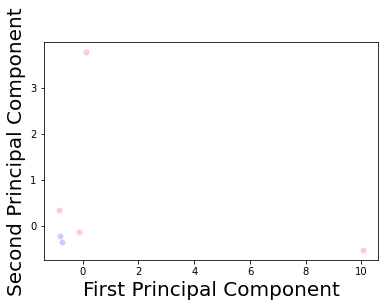

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import time
from test_xgboost import perf_parse
from sklearn.decomposition import PCA

def plot_wrong_samples():
    # First compute the Principle transform matrix
    # Transform the wrong samples into 2-d and show them in figure
    wrong_sample = x_test[y_test != predictions]
    wrong_pred = xgb_model.predict(wrong_sample)
    print(wrong_pred)
    wrong_sample_pca = pca.transform(wrong_sample)
    plt.figure()
    colors = ['b', 'r', 'orange']
    Label_Com = ['positive', 'negative']
    for index in range(2):
        x_1 = wrong_sample_pca[y_test[y_test != predictions] == index][:, 0]
        x_2 = wrong_sample_pca[y_test[y_test != predictions] == index][:, 1]

        plt.scatter(x_1, x_2, c=colors[index], cmap='brg', alpha=0.2, marker='o', linewidth=0)
    plt.xlabel("First Principal Component", fontsize=20)
    plt.ylabel("Second Principal Component", fontsize=20)

    #plt.savefig("PCA.png")
    plt.show()

def xgb_train(data_files, seed = 1):

    dataset = np.load(data_files)
    X = dataset[:, :-1]
    y = dataset[-1]
    x_train, x_test, y_train, y_test = train_test_split(
        dataset[:, :-1], dataset[:, -1], random_state=seed)
    dtrain = xgb.DMatrix(x_train, label=y_train)
    dtest = xgb.DMatrix(x_test, label=y_test)

    evallist = [(dtest, 'eval'), (dtrain, 'train')]
    
    pca = PCA(n_components=2, whiten=True)
    pca.fit(x_train)

    since = time.time()
    num_round = 100

    param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
    xgb_model = xgb.train(param, dtrain, num_round, evallist)
    #xgb_model.fit(x_train, y_train)

    #xgb.plot_tree(xgb_model, num_trees=0)
    #plt.show()

    time_elapsed = time.time() - since
    print('Training complete in {:.2f}s'.format(time_elapsed))
    predictions = xgb_model.predict(dtest)
    predictions = np.array(predictions > 0.5)

    cm_perf = (confusion_matrix(y_test, predictions))
    print("Confusion matrix: \n", cm_perf)
    perf = perf_parse(cm_perf)
    
    ## Wrong Samples analysis
    wrong_sample = x_test[y_test != predictions]
    
    print("The wrong sample Index: ", end='')
    for ele in wrong_sample:
        for i, x in enumerate(X):
            if np.sum(x - ele) == 0:
                print(i, end=' ')
    
    wrong_pred = xgb_model.predict(xgb.DMatrix(wrong_sample))
    print("Wrong prediction",wrong_pred)
    wrong_sample_pca = pca.transform(wrong_sample)
    print(wrong_sample_pca)
    colors = ['b', 'r', 'orange']
    Label_Com = ['positive', 'negative']
    plt.figure()
    for index in range(2):
        x_1 = wrong_sample_pca[y_test[y_test != predictions] == index][:, 0]
        x_2 = wrong_sample_pca[y_test[y_test != predictions] == index][:, 1]

        plt.scatter(x_1, x_2, c=colors[index], cmap='brg', alpha=0.2, marker='o', linewidth=0)
    plt.xlabel("First Principal Component", fontsize=20)
    plt.ylabel("Second Principal Component", fontsize=20)
    plt.show()


    return xgb_model

xgb_1 = xgb_train('data/Nearest_neighbor.npy', 1)
# xgb_model.save_model('xgb.model')
xgb_1.save_model('xgb.model')

if False:
    xgb_model = xgb.XGBClassifier()
    xgb_model.load_model('xgb_classifier.model')

print(xgb_model.evals_result)

In [ ]:
## Using different seperation seed to verify the performance of model
for i in range(10, 300, 50):
    xgb_train('data/satellite_state.npy', i)

## Model Train based on different Data alignment

- Lastest
- Box

[0]	eval-error:0.06900	train-error:0.06785
[1]	eval-error:0.04480	train-error:0.04424
[2]	eval-error:0.02282	train-error:0.02292
[3]	eval-error:0.01842	train-error:0.01814
[4]	eval-error:0.01175	train-error:0.01143
[5]	eval-error:0.01027	train-error:0.01033
[6]	eval-error:0.00539	train-error:0.00528
[7]	eval-error:0.00348	train-error:0.00327
[8]	eval-error:0.00370	train-error:0.00348
[9]	eval-error:0.00355	train-error:0.00338
[10]	eval-error:0.00298	train-error:0.00274
[11]	eval-error:0.00264	train-error:0.00263
[12]	eval-error:0.00202	train-error:0.00196
[13]	eval-error:0.00184	train-error:0.00180
[14]	eval-error:0.00159	train-error:0.00159
[15]	eval-error:0.00121	train-error:0.00120
[16]	eval-error:0.00156	train-error:0.00150
[17]	eval-error:0.00150	train-error:0.00147
[18]	eval-error:0.00112	train-error:0.00113
[19]	eval-error:0.00101	train-error:0.00099
[20]	eval-error:0.00101	train-error:0.00097
[21]	eval-error:0.00094	train-error:0.00092
[22]	eval-error:0.00091	train-error:0.0008

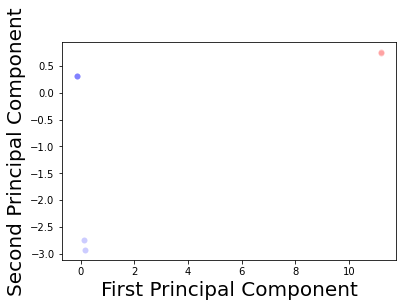

[0]	eval-error:0.06778	train-error:0.06846
[1]	eval-error:0.04704	train-error:0.04821
[2]	eval-error:0.02556	train-error:0.02500
[3]	eval-error:0.01852	train-error:0.01920
[4]	eval-error:0.01185	train-error:0.01130
[5]	eval-error:0.00667	train-error:0.00636
[6]	eval-error:0.00537	train-error:0.00494
[7]	eval-error:0.00444	train-error:0.00395
[8]	eval-error:0.00500	train-error:0.00340
[9]	eval-error:0.00278	train-error:0.00235
[10]	eval-error:0.00259	train-error:0.00154
[11]	eval-error:0.00296	train-error:0.00216
[12]	eval-error:0.00222	train-error:0.00185
[13]	eval-error:0.00185	train-error:0.00123
[14]	eval-error:0.00167	train-error:0.00105
[15]	eval-error:0.00167	train-error:0.00093
[16]	eval-error:0.00130	train-error:0.00056
[17]	eval-error:0.00148	train-error:0.00043
[18]	eval-error:0.00148	train-error:0.00056
[19]	eval-error:0.00148	train-error:0.00068
[20]	eval-error:0.00148	train-error:0.00037
[21]	eval-error:0.00093	train-error:0.00025
[22]	eval-error:0.00093	train-error:0.0003

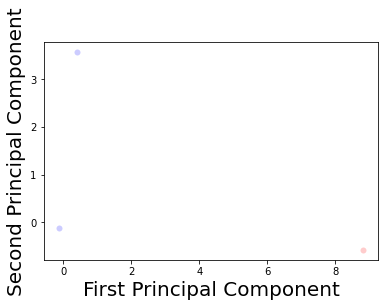

In [6]:
# Latest
xgb_latest = xgb_train('data/latest.npy', 1)
xgb_latest.save_model('model/xgb_latest.model')

# Box
xgb_box = xgb_train('data/box.npy', 1)
xgb_box.save_model('model/xgb_box.model')

### Result Analysis

Testing the models which is trained on other two datasets alignment method

In [12]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from test_xgboost import perf_parse
def test_result(model_file, data_file):
    seed = 1
    xgb_model = xgb.XGBClassifier()
    xgb_model.load_model(model_file)

    print("-" * 10 + model_file[6:] + " " + data_file[5:] + "-" * 10)
    dataset = np.load(data_file)
    x_train, x_test, y_train, y_test = train_test_split(
        dataset[:, :-1], dataset[:, -1], random_state=seed)
    print("Train: {0:d} Test: {1:d}".format(y_train.shape[0], y_test.shape[0]))

    predictions = xgb_model.predict(x_train)
    predictions = np.array(predictions > 0.5)
    cm_perf = (confusion_matrix(y_train, predictions))
    print("Training cm: \n", cm_perf)
    perf = perf_parse(cm_perf)

    predictions = xgb_model.predict(x_test)
    predictions = np.array(predictions > 0.5)
    cm_perf = (confusion_matrix(y_test, predictions))
    print("Test cm: \n", cm_perf)
    perf = perf_parse(cm_perf)

In [13]:
test_result('model/xgb_nn.model', 'data/Nearest_neighbor.npy')
test_result('model/xgb_nn.model', 'data/box.npy')
test_result('model/xgb_nn.model', 'data/latest.npy')
test_result('model/xgb_box.model', 'data/Nearest_neighbor.npy')
test_result('model/xgb_box.model', 'data/box.npy')
test_result('model/xgb_box.model', 'data/latest.npy')
test_result('model/xgb_latest.model', 'data/Nearest_neighbor.npy')
test_result('model/xgb_latest.model', 'data/box.npy')
test_result('model/xgb_latest.model', 'data/latest.npy')

/Users/johnpaul/opt/miniconda3/lib/python3.7/site-packages/xgboost/sklearn.py:424: UserWarning: Loading a native XGBoost model with Scikit-Learn interface.
  'Loading a native XGBoost model with Scikit-Learn interface.')


----------xgb_nn.model Nearest_neighbor.npy----------
Train: 118749 Test: 39584


/Users/johnpaul/opt/miniconda3/lib/python3.7/site-packages/xgboost/sklearn.py:901: UserWarning: Label encoder is not defined.  Returning class probability.
  'Label encoder is not defined.  Returning class probability.')


Training cm: 
 [[77168     0]
 [    0 41581]]
Acc: 100.000, Precision: 100.000 Recall: 100.000
Test cm: 
 [[25680     2]
 [    4 13898]]
Acc: 99.985, Precision: 99.986 Recall: 99.971
----------xgb_nn.model box.npy----------
Train: 16199 Test: 5400
Training cm: 
 [[10502     0]
 [    4  5693]]
Acc: 99.975, Precision: 100.000 Recall: 99.930
Test cm: 
 [[3521    0]
 [   1 1878]]
Acc: 99.981, Precision: 100.000 Recall: 99.947
----------xgb_nn.model latest.npy----------
Train: 514137 Test: 171379
Training cm: 
 [[333849     18]
 [    21 180249]]
Acc: 99.992, Precision: 99.990 Recall: 99.988
Test cm: 
 [[110769      7]
 [     5  60598]]
Acc: 99.993, Precision: 99.988 Recall: 99.992
----------xgb_box.model Nearest_neighbor.npy----------
Train: 118749 Test: 39584
Training cm: 
 [[77139    29]
 [   31 41550]]
Acc: 99.949, Precision: 99.930 Recall: 99.925
Test cm: 
 [[25670    12]
 [   16 13886]]
Acc: 99.929, Precision: 99.914 Recall: 99.885
----------xgb_box.model box.npy----------
Train: 16199